In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [4]:
# Reading Dataset#EMSCAD(Employment Scam Aegean Dataset)
# Dataset is from https://www.kaggle.com/amruthjithrajvr/recruitment-scam
data=pd.read_csv("D:\Admin\Documents\DataSet.csv\DataSet.csv")

In [5]:
# Reading top 5 rows of our dataset
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [6]:
#data.replace('t',1)

In [7]:
#data.replace('f',0)

In [8]:
# To check the number of rows and column
data.shape

(17880, 18)

In [9]:
data.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

In [10]:
# let us check the missing values in our dataset

data.isnull().sum()


title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [11]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop([ 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions','in_balanced_dataset'],axis=1,inplace = True)

In [12]:
print(data.shape)
data.head()

(17880, 13)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,Other,Internship,NaN,NaN,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,NaN,NaN,NaN,NaN,NaN,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f


In [13]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [14]:
#Create independent and Dependent Features
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
random_seed = 42

columns = data.columns.tolist()
columns = [c for c in columns if c not in ["fraudulent"]]
target = "fraudulent"
X = data[columns]
Y = data["fraudulent"]

# Use RandomUnderSampler with a specified random seed
#to ddress the issue of class imbalance in a dataset (to make distribution of classes('t' or 'f') equal)
under_sampler = RandomUnderSampler(random_state=random_seed)
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
df3 = pd.DataFrame(y_res)

result = pd.concat([df1, df3], axis=1, join='inner')

# Reset the index to start from 0
result.reset_index(drop=True, inplace=True)

display(result)

data = result


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,SEM Coordinator,"GR, I, Athens",,<p>#URL_c379aa631173ed5b7c345ab3f500a9a053e509...,<p>The right candidate will be responsible for...,<p>- Previous experience of minimum 3 ye...,<p>- Attractive Remuneration Package.</p...,Full-time,,,,,f
1,Senior Data Scientist,"GB, LND, London",Engineering,"<p>As a growing and successful startup, Conver...",<p>Conversocial builds software that helps com...,<ul>\r\n<li>Good working knowledge of Python o...,<ul>\r\n<li>Salary of £40-55k plus stock optio...,,,,,Engineering,f
2,Junior Web Marketing Specialist,"GR, I, Ilion",Web Marketing και Social,<p>Η Atnet Communications A.E. είναι μια αμιγώ...,<p>Η Atnet Communications αναζητά Junior Web M...,<p><b>Απαιτούμενα προσόντα</b>:</p>\r\n<ul>\r\...,<p>H θέση αφορά μόνιμη απασχόληση στην περιοχή...,Full-time,Entry level,,Marketing and Advertising,Marketing,f
3,New Product Development Project Leader - Full ...,"US, GA, Atlanta",,<p>We Provide Full Time Permanent Positions fo...,<ul>\r\n<li>Coordination and project managemen...,"<p><b><i>Location - </i></b>Atlanta, GA, USA</...",,Full-time,Mid-Senior level,Bachelor's Degree,Management Consulting,Management,f
4,Data Intern - Retail & Apparel Analysis,"GB, LND, London",Fashion:Internships,"<p>We build software for fashion retailers, to...",<h3>About EDITD</h3>\r\n<p>EDITD’s software is...,,,Other,Internship,,Apparel & Fashion,,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,<p>Student Positions Part-Time and Full-Time.<...,,,Part-time,,,,,t
1728,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,<p><b>LEARN TO EARN AN EXECUTIVE LEVEL INCOME<...,<p><b>What You Can Do.</b></p>\r\n<p><b> </b><...,<p><b>Who We Are</b></p>\r\n<p><b> </b></p>\r\...,,,,,,t
1729,Android Developer,"PL, MZ, Warsaw",,,<p>inFullMobile Sp. z o.o. is a mobile softwar...,<p>• A proven track record in Android / JAVA p...,<ul>\r\n<li>attractive salary (adequate to the...,,,,,,t
1730,Payroll Clerk,"US, NY, New York",,,<p>JOB DESCRIPTION<br><br>We are seeking a ful...,<p><br>JOB REQUIREMENTS<br><br>• High schoo...,<p>We offer a competitive salary and benefits ...,Full-time,,,Apparel & Fashion,Accounting/Auditing,t


In [15]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [16]:
#this cell is saying how many real jobs and fake jobs are there in dataset
print(data['fraudulent'].unique())
print(data['fraudulent'].isnull().sum())

sizes = [data.fraudulent[data['fraudulent']== 't'].count(), data.fraudulent[data['fraudulent']== 'f'].count()]
fraudulent_counts = data.fraudulent[data['fraudulent'] == 't'].count()
non_fraudulent_counts = data.fraudulent[data['fraudulent'] == 'f'].count()

print(f"Fraudulent counts: {fraudulent_counts}")
print(f"Non-fraudulent counts: {non_fraudulent_counts}")

sizes = [fraudulent_counts, non_fraudulent_counts]


['f' 't']
0
Fraudulent counts: 866
Non-fraudulent counts: 866


# Explaratory Data Analysis

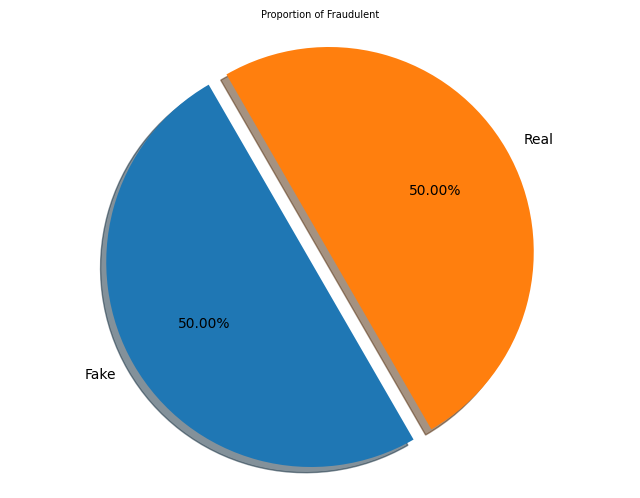

In [17]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 't'].count(), data.fraudulent[data['fraudulent']== 'f'].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [18]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

0       GR
1       GB
2       GR
3       US
4       GB
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1732, dtype: object

In [19]:
# this will give unique country values
data['country'].nunique()

52

In [20]:
# top 11 country that post jobs 
data['country'].value_counts()[:11]

US    1236
GB     128
GR      61
AU      47
        40
CA      36
NZ      26
DE      23
IN      15
MY      12
EE       7
Name: country, dtype: int64

Text(0.5, 0, 'Countries')

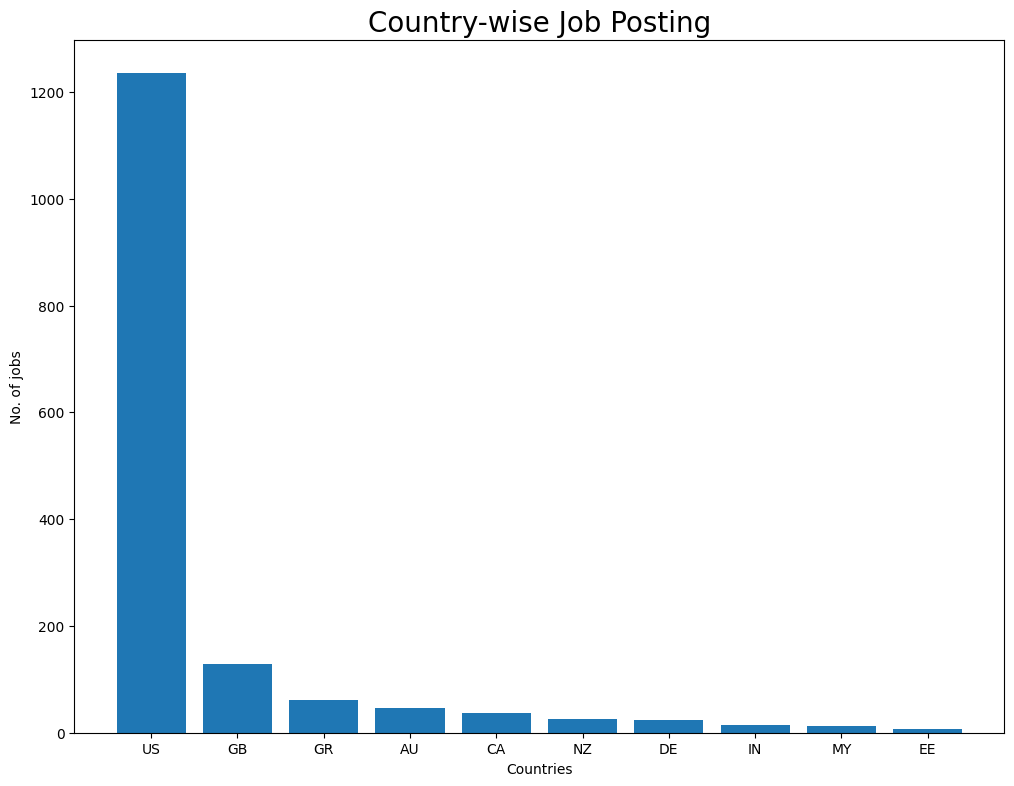

In [21]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [22]:
country.keys()

dict_keys(['US', 'GB', 'GR', 'AU', 'CA', 'NZ', 'DE', 'IN', 'MY', 'EE'])

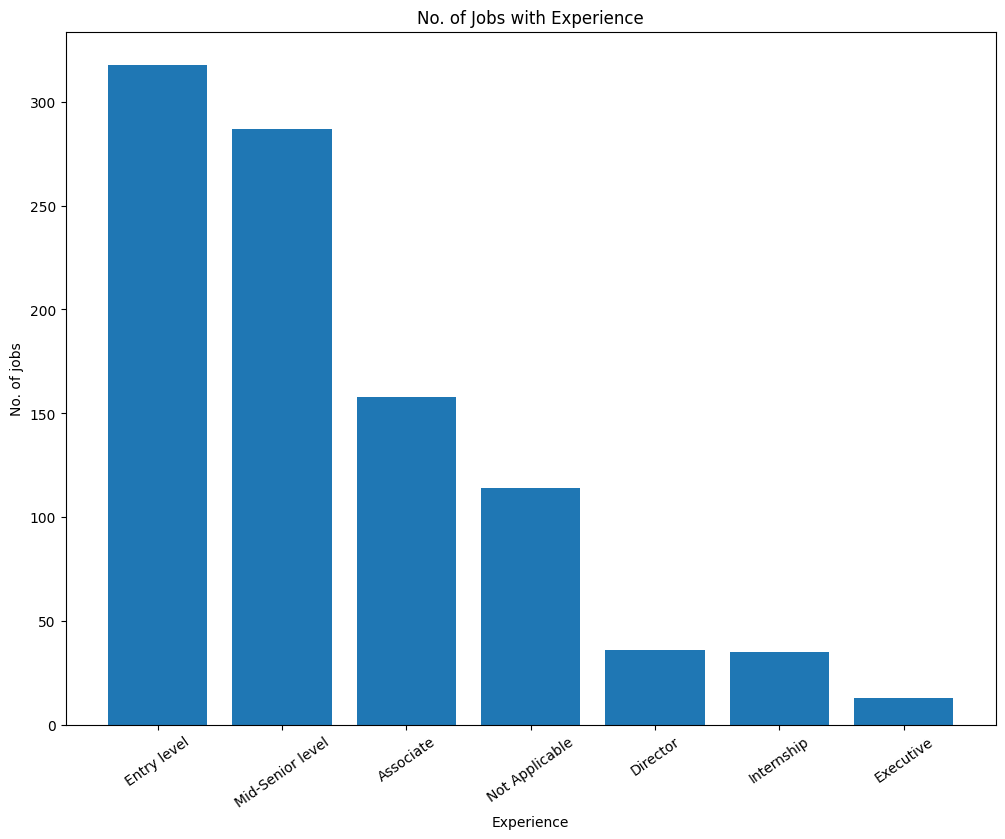

In [23]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [24]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [25]:
#Most frequent jobs
print(data.title.value_counts()[:10])

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         19
Administrative Assistant                                                18
English Teacher Abroad                                                  16
Graduates: English Teacher Abroad (Conversational)                      14
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [26]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent=='t'].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [27]:
print(data[data.fraudulent=='f'].title.value_counts()[:10])

English Teacher Abroad                                16
Graduates: English Teacher Abroad (Conversational)    14
Software Engineer                                      6
Account Executive                                      6
Customer Service Associate                             5
Web Developer                                          5
Customer Service Associate - Part Time                 4
iOS Developer                                          4
Account Manager                                        4
Graphic Designer                                       4
Name: title, dtype: int64


In [28]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [29]:
data.head()

,fraudulent,text
0,f,"SEM Coordinator GR, I, Athens <p>#URL_c379aa63..."
1,f,"Senior Data Scientist GB, LND, London <p>As a ..."
2,f,"Junior Web Marketing Specialist GR, I, Ilion <..."
3,f,New Product Development Project Leader - Full ...
4,f,"Data Intern - Retail & Apparel Analysis GB, LN..."


In [30]:
print(data)

     fraudulent                                               text
0             f  SEM Coordinator GR, I, Athens <p>#URL_c379aa63...
1             f  Senior Data Scientist GB, LND, London <p>As a ...
2             f  Junior Web Marketing Specialist GR, I, Ilion <...
3             f  New Product Development Project Leader - Full ...
4             f  Data Intern - Retail & Apparel Analysis GB, LN...
...         ...                                                ...
1727          t  Student Positions Part-Time and Full-Time. US,...
1728          t  Sales Associate AU, NSW, Sydney   <p><b>LEARN ...
1729          t  Android Developer PL, MZ, Warsaw   <p>inFullMo...
1730          t  Payroll Clerk  US, NY, New York   <p>JOB DESCR...
1731          t  Furniture mover US, IL, Chicago <p>Anthony War...

[1732 rows x 2 columns]


**Understanding the common words used in the texts : Wordcloud**

In [31]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 

In [32]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

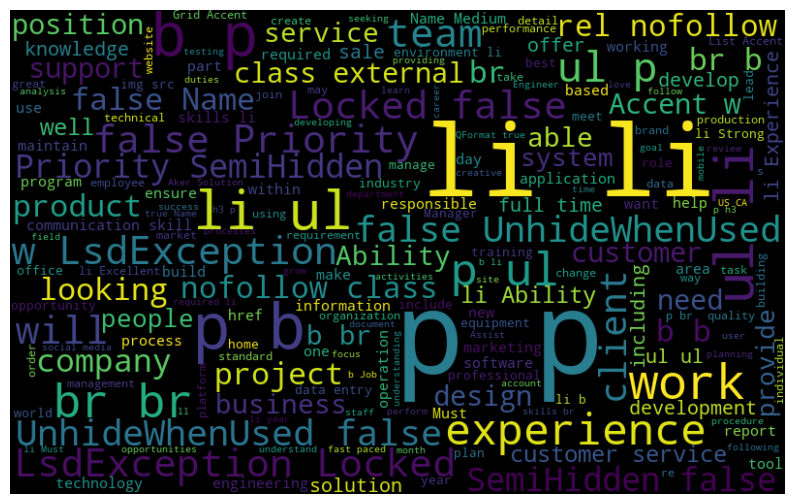

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']=='f']])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


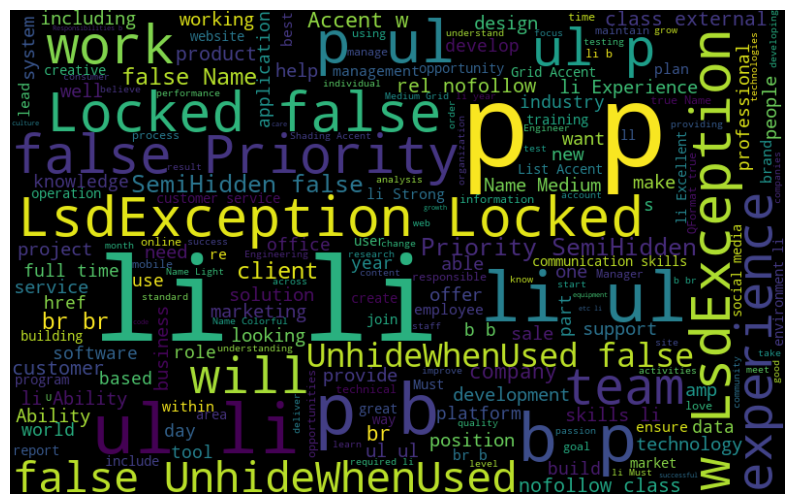

In [35]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 't']])

In [37]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

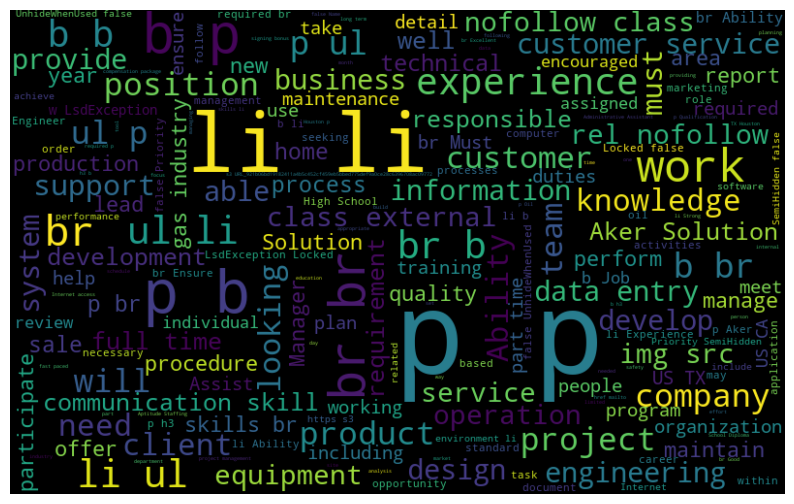

In [38]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [39]:
# NLTK :: Natural Language Toolkit
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords

In [40]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [42]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [43]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [44]:
#print(data)
data['text'][1730]

'payroll clerk us, ny, new york <p>job description<br><br>we seeking full time payroll clerk manage day day accounting operation. <br><br>pay scale : $30/hr<br><br>responsibilities include<br>- balancing company accounts<br>- processing weekly payroll<br>- processing company credit cards<br>- processing rebates<br>- overall company record keeping<br><br><br></p> <p><br>job requirements<br><br>• high school diploma equivalent<br>• excellent communication organizational skills.<br>• ability work flexible schedule<br>• ability perform mathematical calculations addition, subtraction, multiplication, division, percentages.</p> <p>we offer competitive salary benefits package includes health dental insurance, paid vacation, 401(k) plan, paid training, much more. ready rapid growth own.<br><br></p> apparel & fashion'

In [45]:
#from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
#X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [46]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
random_seed = 42

# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.text, 
    data.fraudulent, 
    test_size=0.3, 
    random_state=random_seed
)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1212,)
X_test shape: (520,)
y_train shape: (1212,)
y_test shape: (520,)


In [47]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


585     f
1555    t
1662    t
1068    t
889     t
       ..
1130    t
1294    t
860     f
1459    t
1126    t
Name: fraudulent, Length: 1212, dtype: object
585     head marketing us, ca, menlo park <p>transifex...
1555    controls engineer - troy, mi us, mi, troy <p>s...
1662    optician / sales us, md, bethesda <p>we long t...
1068    brand partner us, ca, <p>looking motivated har...
889     executive sous chef my, , <p>le meridien situa...
                              ...                        
1130    dispatcher us, oh, cincinnati <p>bradley contr...
1294    business operations associate us, ks, overland...
860     estimator us, ca, fairfield <p>an estimator re...
1459    nurse shift/program supervisor us, ky, <p><b>a...
1126    data entry us, ny, acra <p>data entry<br><br>t...
Name: text, Length: 1212, dtype: object


In [48]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [49]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed




  (0, 1)	4
  (0, 52)	1
  (0, 74)	1
  (0, 75)	1
  (0, 95)	1
  (0, 543)	1
  (0, 544)	1
  (0, 549)	1
  (0, 679)	1
  (0, 722)	1
  (0, 792)	1
  (0, 818)	3
  (0, 885)	1
  (0, 886)	1
  (0, 1005)	2
  (0, 1008)	1
  (0, 1019)	1
  (0, 1029)	1
  (0, 1070)	1
  (0, 1088)	3
  (0, 1092)	2
  (0, 1097)	1
  (0, 1101)	3
  (0, 1221)	1
  (0, 1251)	1
  :	:
  (1211, 12816)	4
  (1211, 12838)	1
  (1211, 13161)	1
  (1211, 13195)	1
  (1211, 13286)	1
  (1211, 13337)	1
  (1211, 13390)	1
  (1211, 13453)	1
  (1211, 13618)	3
  (1211, 13642)	1
  (1211, 13720)	1
  (1211, 13780)	1
  (1211, 13815)	1
  (1211, 13827)	1
  (1211, 13907)	3
  (1211, 14623)	1
  (1211, 14633)	1
  (1211, 14689)	1
  (1211, 14783)	1
  (1211, 14790)	1
  (1211, 14875)	1
  (1211, 15232)	1
  (1211, 15257)	1
  (1211, 15263)	1
  (1211, 15379)	1


In [50]:
dense_matrix = X_train_dtm.toarray()
print(dense_matrix)


[[0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [52]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x15799 sparse matrix of type '<class 'numpy.int64'>'
	with 89665 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error


<h2>Naive Bayes</h2>

In [54]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 15.9 ms


MultinomialNB()

In [55]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

['f' 't' 'f' 't' 't' 't' 'f' 'f' 't' 't' 'f' 't' 'f' 'f' 'f' 'f' 'f' 't'
 't' 't' 'f' 'f' 't' 't' 'f' 't' 'f' 'f' 't' 'f' 't' 'f' 'f' 't' 't' 't'
 't' 't' 't' 't' 'f' 'f' 'f' 't' 't' 't' 't' 't' 't' 't' 't' 'f' 'f' 'f'
 'f' 't' 'f' 't' 'f' 'f' 'f' 't' 'f' 'f' 'f' 't' 'f' 'f' 't' 't' 't' 't'
 'f' 'f' 't' 'f' 'f' 'f' 't' 't' 't' 'f' 't' 't' 't' 't' 'f' 'f' 'f' 'f'
 't' 't' 't' 'f' 't' 't' 'f' 'f' 'f' 't' 'f' 'f' 't' 'f' 't' 't' 't' 't'
 't' 't' 'f' 't' 'f' 'f' 'f' 't' 't' 'f' 'f' 't' 'f' 't' 'f' 'f' 't' 'f'
 't' 'f' 't' 'f' 'f' 'f' 't' 't' 't' 't' 'f' 't' 'f' 'f' 'f' 't' 'f' 't'
 'f' 't' 'f' 'f' 'f' 'f' 't' 't' 't' 'f' 't' 't' 'f' 'f' 'f' 't' 't' 't'
 't' 'f' 'f' 'f' 'f' 't' 'f' 't' 't' 'f' 'f' 'f' 'f' 'f' 't' 'f' 't' 'f'
 'f' 'f' 'f' 't' 't' 'f' 'f' 'f' 't' 'f' 'f' 't' 'f' 'f' 't' 't' 't' 'f'
 't' 't' 'f' 'f' 'f' 't' 'f' 't' 't' 't' 'f' 't' 't' 't' 't' 'f' 'f' 'f'
 'f' 'f' 't' 't' 't' 'f' 'f' 'f' 'f' 'f' 't' 'f' 't' 'f' 'f' 'f' 't' 't'
 't' 't' 't' 'f' 't' 'f' 't' 't' 't' 'f' 'f' 'f' 't

In [56]:
import seaborn as sn

In [57]:
accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_nb)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_nb).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)


#cm = confusion_matrix(y_test,y_pred_nb)

#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

Classification Accuracy: 0.9115384615384615
Classification Report

              precision    recall  f1-score   support

           f       0.92      0.90      0.91       257
           t       0.90      0.92      0.91       263

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520

Confusion Matrix

[[231  26]
 [ 20 243]]
Cohen's Kappa Score: 0.8230062302990839
Mean Squared Error: 0.08846153846153847


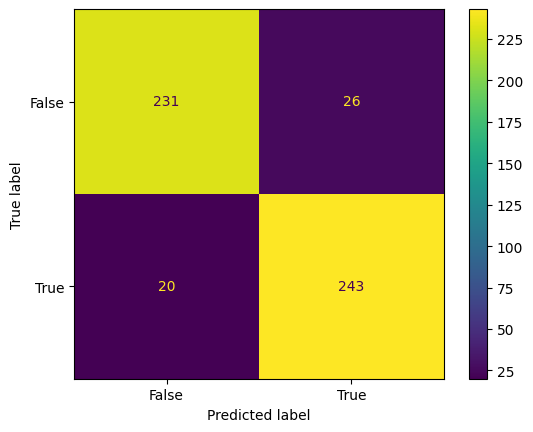

In [58]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


<h2>Decision Tree Classifier</h2>

In [59]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [60]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: total: 1.81 s
Wall time: 2.68 s


DecisionTreeClassifier()

In [61]:
# make class predictions for X_test_dtm
y_pred_dt = dt.predict(X_test_dtm)

In [62]:
# Model Accuracy

print("Classification Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_dt))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_dt)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_dt).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)



Classification Accuracy: 0.85
Classification Report

              precision    recall  f1-score   support

           f       0.87      0.82      0.84       257
           t       0.83      0.88      0.86       263

    accuracy                           0.85       520
   macro avg       0.85      0.85      0.85       520
weighted avg       0.85      0.85      0.85       520

Confusion Matrix

[[211  46]
 [ 32 231]]
Cohen's Kappa Score: 0.6997734977571837
Mean Squared Error: 0.15


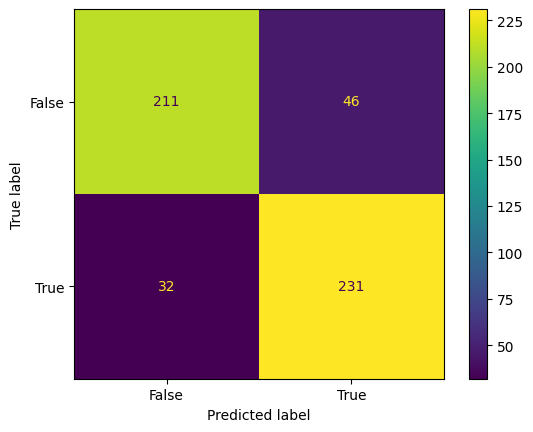

In [63]:
# Confusion Matrix

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


## Building a Predictive System

In [64]:
#Lets Predict for a data set
X_test

599     initiativbewerbung de, be, berlin <p>wir sind ...
1713    customer service representative us, pa, philad...
628     production trading floor support us, , new yor...
1501    payroll clerk us, ny, new york <p>we seeking f...
1564    data entry admin/clerical positions - work hom...
                              ...                        
1278    payroll clerk us, in, indianapolis <p>at dynco...
287     manufacturing engineering manager us, oh, clev...
1480    data entry/ administrative assistant us, md, l...
1717    csr us, la, slidell <p>now hiring csr / advert...
1179    sales professional- mid market us, ca, irvine ...
Name: text, Length: 520, dtype: object

In [65]:
y_test

599     f
1713    t
628     f
1501    t
1564    t
       ..
1278    t
287     f
1480    t
1717    t
1179    t
Name: fraudulent, Length: 520, dtype: object

In [66]:
print(X_test[599])

initiativbewerbung de, be, berlin <p>wir sind ein junges berliner mobile-startup, das meinungen und unterhaltung innovativ zusammenbringt. mit unserer android-app timezapp beantworten unsere nutzer fragen unterhaltsam und einfach. unsere app wird mit begeisterung aufgenommen. jetzt suchen wir für den ausbau unseres großartigen teams berlin engagierte teammitglieder.</p> <p><b>keine passende stellenausschreibung gefunden?</b></p> <p>wir sind immer auf der suche nach kreativen und motivierten neuen kollegen. schreib uns und überzeuge uns!</p> <p>zappchoice ist ein wachsendes berliner startup, das meinungen und unterhaltung zusammenbringt. mit unserer android-app timezapp haben wir eine innovative art geschaffen, um mit motivierenden und unterhaltenen fragen spannende insights von unseren nutzern zu gewinnen. die app ist seit ende 2013 bei google play verfügbar und wird mit begeisterung aufgenommen.</p> <p>bitte schicke deine aussagekräftigen bewerbungsunterlagen per e-mail mit dem betref

In [67]:
#input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping &amp; receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [68]:
#input_text=["home based typist/ data entry clerk za, wc, oudtshoorn <p>we several openings available area offering competitive income averaging r2,500 per week. seeking only, honest, self-motivated people desire work home typing data entry field, comfort homes. experience needed. . fit description meet requirements, please apply <a href=mailto:email_3b3253aa3e1aa29ecb8bffbcc2811a9d106482ed5d0aa334ca98e74289e2c3af, rel=nofollow class=external#email_3b3253aa3e1aa29ecb8bffbcc2811a9d106482ed5d0aa334ca98e74289e2c3af#</a></p> <p>applicants computer internet access basic computer typing skills, ability spell print neatly, ability follow directions</p> <p>averaging r2,500 per week depending working part-time full-time</p>"]
#input_text=[X_test[7949]]
input_text=["gottipalli,dataanalyst"]

In [69]:
# convert text to feature vectors
input_data_features = vect.transform(input_text)

# making prediction

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]=='t'):
  print('Fraudulant Job')

else:
  print('Real Job')

['t']
Fraudulant Job


In [70]:
#Lets check wether predicted result was correct or not
print(y_test[599])

f


Thus the predicted result was correct.

In [71]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have your features X and labels y
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# Instantiate the Support Vector Machine (SVM) classifier
svm = SVC()

# Measure the training time
%time svm.fit(X_train_dtm, y_train)

# Make predictions on the testing data
y_pred_svm = svm.predict(X_test_dtm)

# Calculate and print accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_svm))

# Print Classification Report
print("Classification Report\n")
print(classification_report(y_test, y_pred_svm))

# Print Confusion Matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_svm))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_svm)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_svm).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)


CPU times: total: 4.02 s
Wall time: 4.58 s
Classification Accuracy: 0.8615384615384616
Classification Report

              precision    recall  f1-score   support

           f       0.87      0.84      0.86       257
           t       0.85      0.88      0.87       263

    accuracy                           0.86       520
   macro avg       0.86      0.86      0.86       520
weighted avg       0.86      0.86      0.86       520

Confusion Matrix

[[216  41]
 [ 31 232]]
Cohen's Kappa Score: 0.7229170675389648
Mean Squared Error: 0.13846153846153847


In [72]:
#import seaborn as sn
#cm = confusion_matrix(y_test,y_pred_class)

#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

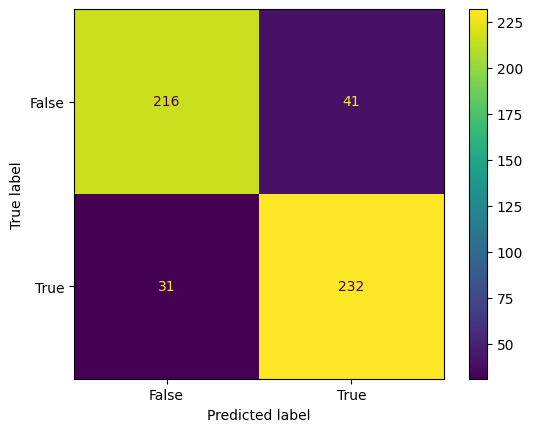

In [73]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


In [74]:
X_test

599     initiativbewerbung de, be, berlin <p>wir sind ...
1713    customer service representative us, pa, philad...
628     production trading floor support us, , new yor...
1501    payroll clerk us, ny, new york <p>we seeking f...
1564    data entry admin/clerical positions - work hom...
                              ...                        
1278    payroll clerk us, in, indianapolis <p>at dynco...
287     manufacturing engineering manager us, oh, clev...
1480    data entry/ administrative assistant us, md, l...
1717    csr us, la, slidell <p>now hiring csr / advert...
1179    sales professional- mid market us, ca, irvine ...
Name: text, Length: 520, dtype: object

In [75]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have your features X_train and labels y_train
# Also, assuming you have a new input_text to classify

# Instantiate the Support Vector Machine (SVM) classifier
svm = SVC()

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)

# Train (fit) the SVM model
svm.fit(X_train_dtm, y_train)

# Now, you can use the trained model for predictions
input_text = [X_test[599]]
input_data_features = vectorizer.transform(input_text)

# Make predictions
prediction = svm.predict(input_data_features)

# Print the predicted target
print(prediction)

# Check the prediction and print the result
if prediction[0] == 't':
    print('Fraudulent Job')
else:
    print('Real Job')


['t']
Fraudulent Job


In [76]:
print(y_test[599])

f


In [77]:
#Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Assuming you have your features X and labels y
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y_test, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

# Measure the time taken for fitting the model
start_time = time.time()
rf.fit(X_train_dtm, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken for training: {elapsed_time} seconds")

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test_dtm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Classification Accuracy:", accuracy)

# Print Classification Report
print("Classification Report\n")
print(classification_report(y_test, y_pred_rf))

# Print Confusion Matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_rf)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_rf).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)

Time taken for training: 6.877431392669678 seconds
Classification Accuracy: 0.9192307692307692
Classification Report

              precision    recall  f1-score   support

           f       0.91      0.93      0.92       257
           t       0.93      0.91      0.92       263

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520

Confusion Matrix

[[239  18]
 [ 24 239]]
Cohen's Kappa Score: 0.8384830421985239
Mean Squared Error: 0.08076923076923077


In [79]:
#import seaborn as sn
#cm = confusion_matrix(y_test,y_pred_class)

#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True, fmt='d')
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

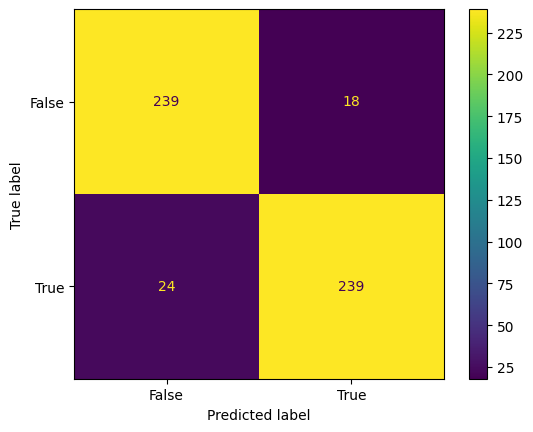

In [80]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()


In [81]:
#mlp

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error


# Assuming 'X' contains text data
# 'y' contains the corresponding labels

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# Instantiate the MLPClassifier
mlp = MLPClassifier(random_state=42)  # You can customize parameters based on your needs

# Measure the training time
%time mlp.fit(X_train_dtm, y_train)

# Make predictions on the testing data
y_pred_mlp = mlp.predict(X_test_dtm)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Classification Accuracy:", accuracy)

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_mlp)

print("Cohen's Kappa Score:", kappa)


# Print classification report
print("Classification Report\n")
print(classification_report(y_test, y_pred_mlp))

# Print confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_mlp))


CPU times: total: 29.8 s
Wall time: 47.9 s
Classification Accuracy: 0.9326923076923077
Cohen's Kappa Score: 0.8653487615045427
Classification Report

              precision    recall  f1-score   support

           f       0.94      0.93      0.93       257
           t       0.93      0.94      0.93       263

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520

Confusion Matrix

[[238  19]
 [ 16 247]]


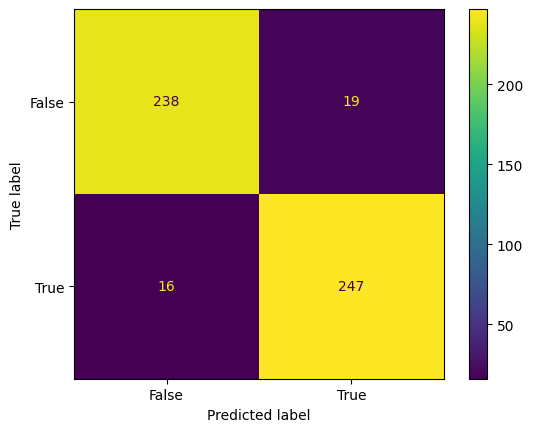

In [83]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_mlp)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error

# Convert categorical labels to numerical values
y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_mlp).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.0673076923076923


In [85]:
#KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error


# Assuming you have your features X and labels y
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data (assuming you have text data)
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Measure the time taken for training
%time knn.fit(X_train_dtm, y_train)

# Make predictions on the testing data
y_pred_knn = knn.predict(X_test_dtm)

# Print classification accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_knn))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_knn)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_knn).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)

# Print classification report
print("Classification Report\n")
print(classification_report(y_test, y_pred_knn))

# Print confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_knn))


CPU times: total: 0 ns
Wall time: 0 ns
Classification Accuracy: 0.7884615384615384
Cohen's Kappa Score: 0.5755480031462875
Mean Squared Error: 0.21153846153846154
Classification Report

              precision    recall  f1-score   support

           f       0.89      0.65      0.75       257
           t       0.73      0.92      0.82       263

    accuracy                           0.79       520
   macro avg       0.81      0.79      0.78       520
weighted avg       0.81      0.79      0.78       520

Confusion Matrix

[[167  90]
 [ 20 243]]


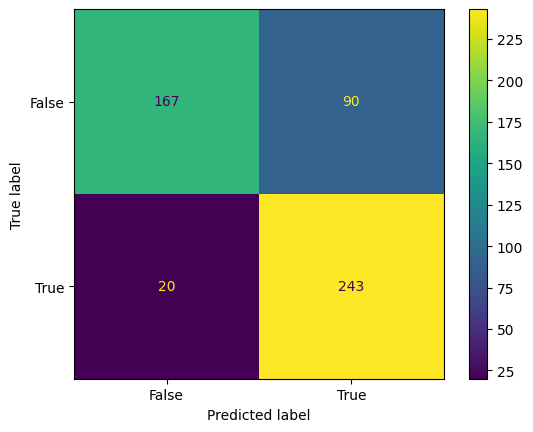

In [87]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [88]:
#AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Assuming you have X_train, X_test, y_train, y_test already defined

# Instantiate the AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Measure training time
start_time = time.time()
adaboost.fit(X_train_dtm, y_train)
training_time = time.time() - start_time
print(f"Training Time: {training_time} seconds")

# Make predictions on the testing data
y_pred_adb = adaboost.predict(X_test_dtm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_adb)
print("Classification Accuracy:", accuracy)

# Display classification report
print("Classification Report\n")
print(classification_report(y_test, y_pred_adb))

# Display confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_adb))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_adb)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_adb).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)


Training Time: 5.497190237045288 seconds
Classification Accuracy: 0.8807692307692307
Classification Report

              precision    recall  f1-score   support

           f       0.89      0.87      0.88       257
           t       0.88      0.89      0.88       263

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520

Confusion Matrix

[[224  33]
 [ 29 234]]
Cohen's Kappa Score: 0.761464360230249
Mean Squared Error: 0.11923076923076924


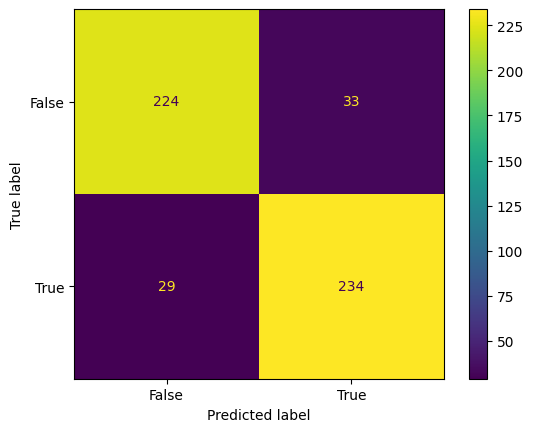

In [90]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_adb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [91]:
#Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have your features X and labels y
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Measure the time to fit the model
%time gb.fit(X_train_dtm, y_train)

# Make predictions on the testing data
y_pred_gbc = gb.predict(X_test_dtm)

# Print the classification accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_gbc))

# Print the classification report
print("Classification Report\n")
print(classification_report(y_test, y_pred_gbc))

# Print the confusion matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_gbc))

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_gbc)
print("Cohen's Kappa Score:", kappa)

y_test_numeric = y_test.map({'t': 1, 'f': 0})
y_pred_class_numeric = pd.Series(y_pred_gbc).map({'t': 1, 'f': 0})

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_numeric, y_pred_class_numeric)

print("Mean Squared Error:", mse)



CPU times: total: 27.3 s
Wall time: 36.4 s
Classification Accuracy: 0.9192307692307692
Classification Report

              precision    recall  f1-score   support

           f       0.93      0.90      0.92       257
           t       0.91      0.94      0.92       263

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520

Confusion Matrix

[[232  25]
 [ 17 246]]
Cohen's Kappa Score: 0.8383826424141962
Mean Squared Error: 0.08076923076923077


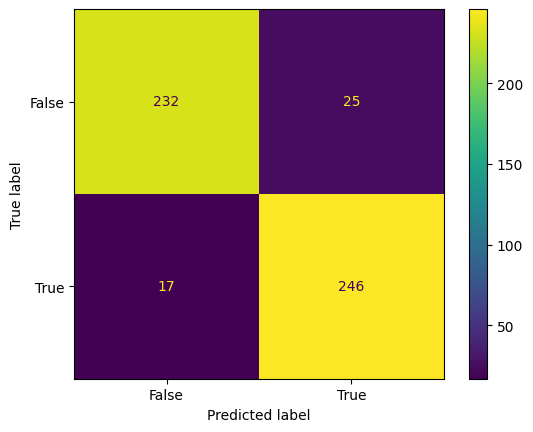

In [93]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm =metrics.confusion_matrix(y_test, y_pred_gbc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

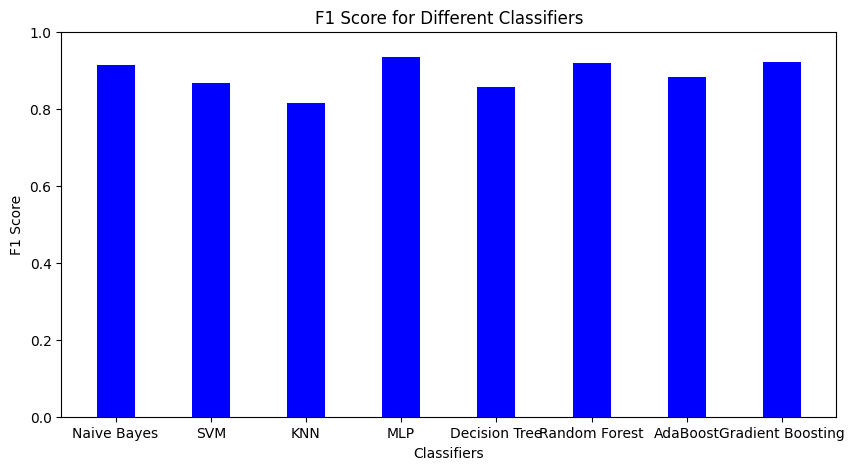

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Assuming you have the true labels (y_test) and predicted labels (y_pred) for each classifier
# Update the 'classifiers' dictionary with your actual classifier names and corresponding predicted labels

classifiers = {
    'Naive Bayes': y_pred_nb,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn,
    'MLP': y_pred_mlp,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_adb,
    'Gradient Boosting': y_pred_gbc
}

# Compute F1 scores dynamically
f1_scores = {classifier: f1_score(y_test, y_pred,pos_label='t') for classifier, y_pred in classifiers.items()}

# Plotting the bar graph
fig = plt.figure(figsize=(10, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color='blue', width=0.4)
plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("F1 Score for Different Classifiers")
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1 for F1 score
plt.show()


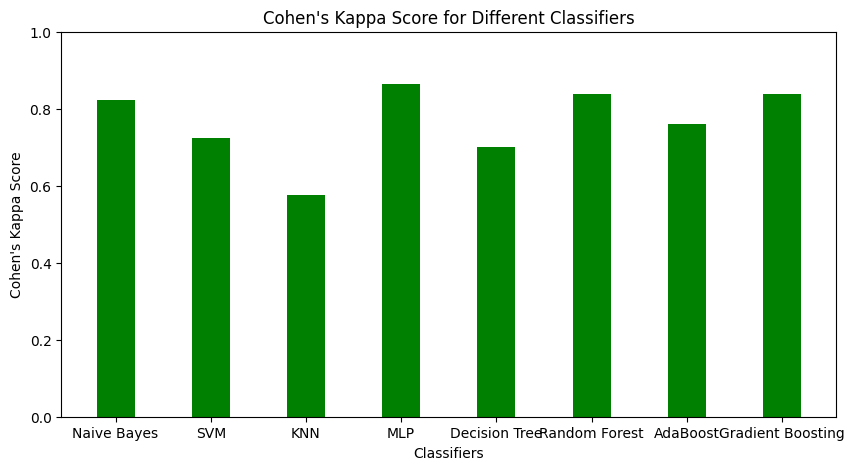

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

# Assuming you have the true labels (y_test) and predicted labels (y_pred) for each classifier
# Update the 'classifiers' dictionary with your actual classifier names and corresponding predicted labels

classifiers = {
    'Naive Bayes': y_pred_nb,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn,
    'MLP': y_pred_mlp,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_adb,
    'Gradient Boosting': y_pred_gbc
}

# Compute Cohen's Kappa scores dynamically
kappa_scores = {classifier: cohen_kappa_score(y_test, y_pred) for classifier, y_pred in classifiers.items()}

# Plotting the bar graph
fig = plt.figure(figsize=(10, 5))
plt.bar(kappa_scores.keys(), kappa_scores.values(), color='green', width=0.4)
plt.xlabel("Classifiers")
plt.ylabel("Cohen's Kappa Score")
plt.title("Cohen's Kappa Score for Different Classifiers")
plt.ylim([0, 1])  # Set the y-axis limits between -1 and 1 for Kappa score
plt.show()


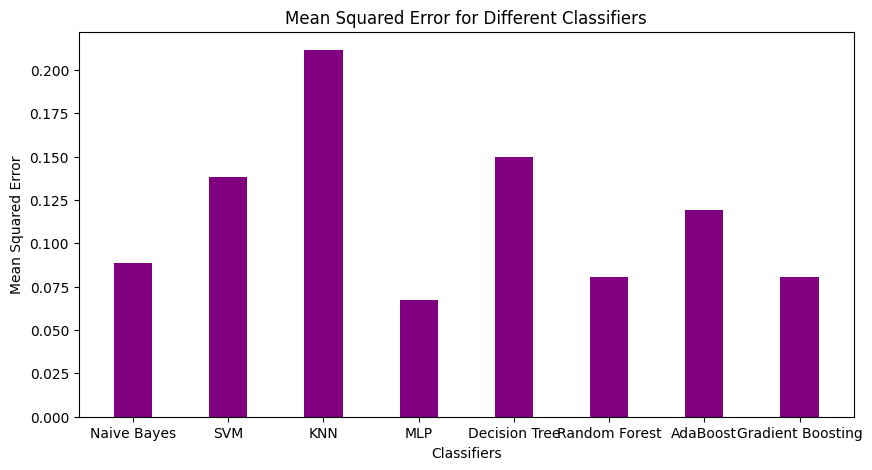

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming you have the true labels (y_test) and predicted labels (y_pred) for each classifier
# Update the 'classifiers' dictionary with your actual classifier names and corresponding predicted labels

classifiers = {
    'Naive Bayes': y_pred_nb,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn,
    'MLP': y_pred_mlp,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_adb,
    'Gradient Boosting': y_pred_gbc
}

# Convert labels to numeric if needed
y_test_numeric = y_test.map({'t': 1, 'f': 0})

# Compute Mean Squared Errors dynamically
mse_scores = {classifier: mean_squared_error(y_test_numeric, pd.Series(y_pred).map({'t': 1, 'f': 0})) for classifier, y_pred in classifiers.items()}

# Plotting the bar graph
fig = plt.figure(figsize=(10, 5))
plt.bar(mse_scores.keys(), mse_scores.values(), color='purple', width=0.4)
plt.xlabel("Classifiers")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for Different Classifiers")
plt.show()


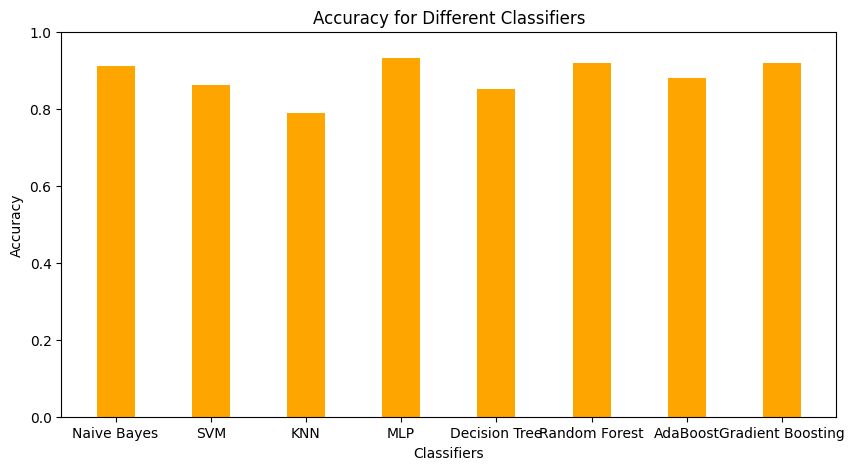

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have the true labels (y_test) and predicted labels (y_pred) for each classifier
# Update the 'classifiers' dictionary with your actual classifier names and corresponding predicted labels

classifiers = {
    'Naive Bayes': y_pred_nb,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn,
    'MLP': y_pred_mlp,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_adb,
    'Gradient Boosting': y_pred_gbc
}

# Compute accuracies dynamically
accuracy_scores = {classifier: accuracy_score(y_test, y_pred) for classifier, y_pred in classifiers.items()}

# Plotting the bar graph
fig = plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='orange', width=0.4)
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Classifiers")
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1 for accuracy
plt.show()
